In [16]:
%pwd

'/content'

In [ ]:
%%bash
pip install --upgrade numpy
pip install -e '/content/drive/MyDrive/Colab Notebooks/xarray_frac/'

  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
Obtaining file:///content/drive/MyDrive/Colab%20Notebooks/xarray_frac
  Running setup.py develop for xarrayfrac


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np
from dask.distributed import LocalCluster, Client
import xarray_frac
import xarray as xr

In [ ]:
ds = xr.open_dataset(None, engine="xarray_frac", resolution=100000, chunks={"x": 2000, "y": 2000})

In [ ]:
ds

,Array,Chunk
Bytes,40.00 GB,16.00 MB
Shape,"(100000, 100000)","(2000, 2000)"
Count,2501 Tasks,2500 Chunks
Type,float32,numpy.ndarray


In [ ]:
ds.frac.isel(x=2, y=2).compute()

<xarray.DataArray 'frac' ()>
array(0)
Coordinates:
    x        float64 -2.0
    y        float64 -2.0

In [ ]:
sampled = ds.frac.isel(x=slice(0, 100000, 100), y=slice(0, 100000, 100))

In [ ]:
sampled

<xarray.DataArray 'frac' (x: 1000, y: 1000)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * x        (x) float64 -2.0 -1.996 -1.992 -1.988 ... 1.984 1.988 1.992 1.996
  * y        (y) float64 -2.0 -1.996 -1.992 -1.988 ... 1.984 1.988 1.992 1.996

In [ ]:
sampled = sampled.compute()

In [ ]:
from matplotlib import pyplot as plt

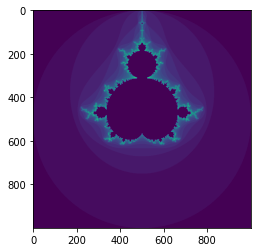

In [ ]:
plt.imshow(sampled)

In [ ]:
window = ds.where((ds.x > -0.1) & (ds.x < 0.1), drop=True).where((ds.y > 0.9) & (ds.y < 1.0), drop=True)

In [ ]:
window.frac[::10, ::10]

<xarray.DataArray 'frac' (x: 500, y: 250)>
dask.array<getitem, shape=(500, 250), dtype=float32, chunksize=(200, 150), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 -0.09998 -0.09958 -0.09918 ... 0.09882 0.09922 0.09962
  * y        (y) float64 0.9 0.9004 0.9008 0.9012 ... 0.9988 0.9992 0.9996

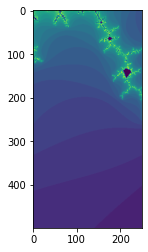

In [ ]:
plt.imshow(window.frac[::10, ::10])